In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
df=pd.read_csv("./Dataset_Hospital_Visits.csv")

#Exploratory Data Analysis

# 3.Exploratory Data Analysis

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88421 non-null  float64
 1   AppointmentID    88421 non-null  int64  
 2   Sex              88421 non-null  object 
 3   ScheduledDate    88421 non-null  object 
 4   AppointmentDate  88421 non-null  object 
 5   Age              79614 non-null  float64
 6   Community        77708 non-null  object 
 7   SocialWelfare    75902 non-null  object 
 8   Hipertension     80400 non-null  object 
 9   Diabetes         88421 non-null  object 
 10  Alcoholism       73532 non-null  object 
 11  Handcap          88421 non-null  object 
 12  SMS_received     88421 non-null  object 
 13  No-show          88421 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.4+ MB


In [35]:
df.describe()

,PatientId,AppointmentID,Age
count,8.842100e+04,8.842100e+04,79614.000000
mean,1.485355e+14,5.675199e+06,37.067903
std,2.572424e+14,7.145639e+04,23.140942
min,3.921784e+04,5.030230e+06,0.000000
25%,4.194616e+12,5.640214e+06,18.000000
50%,3.189960e+13,5.680520e+06,37.000000
75%,9.465347e+13,5.725486e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


In [36]:
print(df.duplicated().sum())

0


In [37]:
print("Initial length:", len(df), "rows")
print(df.isnull().sum())

Initial length: 88421 rows
PatientId              0
AppointmentID          0
Sex                    0
ScheduledDate          0
AppointmentDate        0
Age                 8807
Community          10713
SocialWelfare      12519
Hipertension        8021
Diabetes               0
Alcoholism         14889
Handcap                0
SMS_received           0
No-show                0
dtype: int64


In [38]:
df['PatientId']=df['PatientId'].astype(int)
# use imputer and fit df['Age'] = df['Age'].fillna(0).astype(int)
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])



print(df.info())
df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   PatientId        88421 non-null  int64              
 1   AppointmentID    88421 non-null  int64              
 2   Sex              88421 non-null  object             
 3   ScheduledDate    88421 non-null  datetime64[ns, UTC]
 4   AppointmentDate  88421 non-null  datetime64[ns, UTC]
 5   Age              79614 non-null  float64            
 6   Community        77708 non-null  object             
 7   SocialWelfare    75902 non-null  object             
 8   Hipertension     80400 non-null  object             
 9   Diabetes         88421 non-null  object             
 10  Alcoholism       73532 non-null  object             
 11  Handcap          88421 non-null  object             
 12  SMS_received     88421 non-null  object             
 13  No-show         

<bound method NDFrame.head of              PatientId  AppointmentID Sex             ScheduledDate  \
0       47385269248944        5387604   F 2016-02-24 07:53:17+00:00   
1       65574946592538        5655266   M 2016-05-03 16:29:14+00:00   
2         126547271323        5745855   F 2016-05-30 12:54:18+00:00   
3       26817685826777        5700247   F 2016-05-16 09:15:51+00:00   
4       78135651893663        5656211   F 2016-05-04 07:46:23+00:00   
...                ...            ...  ..                       ...   
88416  145483139676751        5772271   F 2016-06-03 15:01:39+00:00   
88417   32573422373557        5636567   M 2016-04-28 15:38:16+00:00   
88418    3888197577138        5778538   F 2016-06-06 15:46:02+00:00   
88419      78549546682        5787782   F 2016-06-08 10:35:20+00:00   
88420   65811598232774        5666176   F 2016-05-05 16:05:12+00:00   

                AppointmentDate   Age          Community SocialWelfare  \
0     2016-05-13 00:00:00+00:00   NaN      

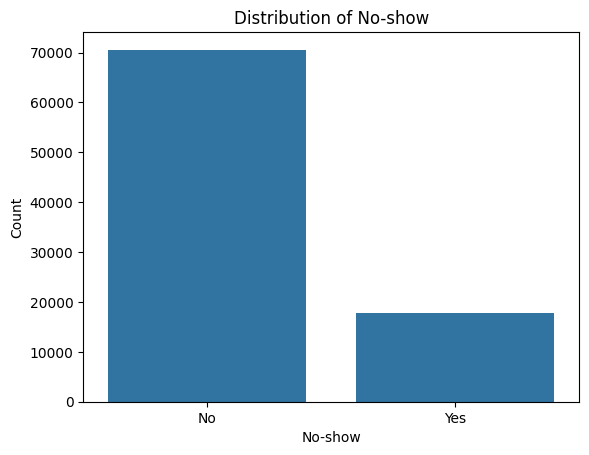

In [39]:
sns.countplot(data=df, x="No-show")
plt.title("Distribution of No-show")
plt.xlabel("No-show")
plt.ylabel("Count")
plt.show()

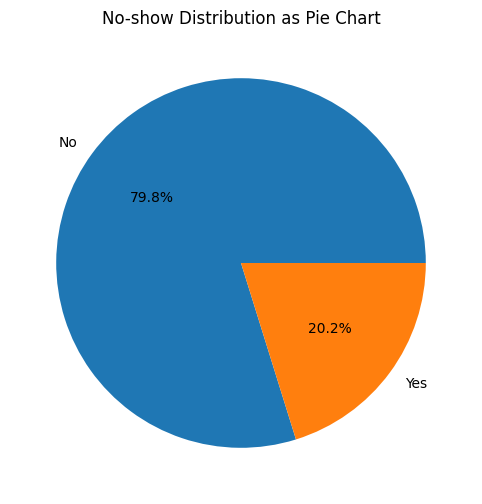

In [40]:
no_show_counts = df['No-show'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(no_show_counts, labels=no_show_counts.index,autopct='%1.1f%%')
plt.title("No-show Distribution as Pie Chart")
plt.show()

<Axes: title={'center': 'Relation between Waiting Time and No Show (Counts)'}, xlabel='No-show', ylabel='Waiting_Time_Categorized'>

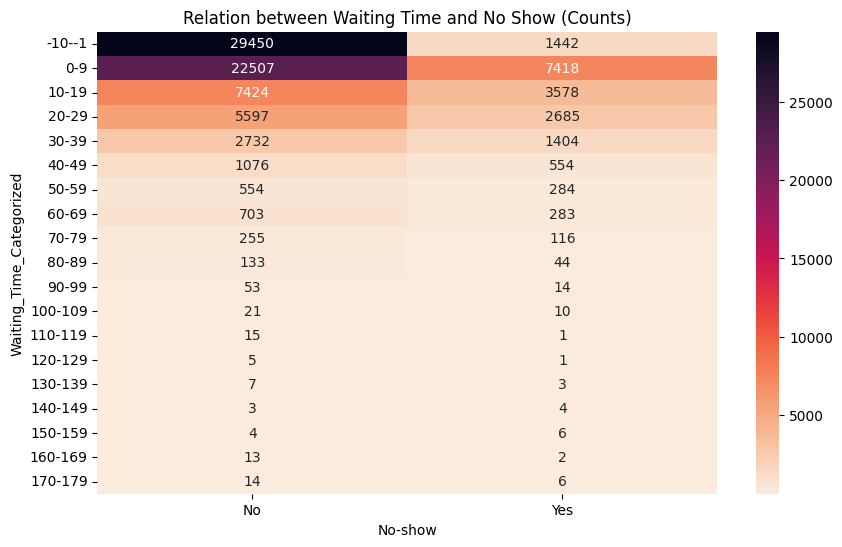

In [41]:
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])
df['WaitingTime'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days

# Categorize waiting time into bins of 10 days
max_waiting_time = df['WaitingTime'].max()
min_waiting_time = df['WaitingTime'].min()
waiting_time_bins = np.arange(-10, max_waiting_time+10,10)
waiting_time_labels = [f"{i}-{i+9}" for i in waiting_time_bins[:-1]]
df['Waiting_Time_Categorized'] = pd.cut(df['WaitingTime'], bins=waiting_time_bins, labels=waiting_time_labels, right=False)

wt_hm_counts = df.pivot_table(index='Waiting_Time_Categorized', columns='No-show', aggfunc='size',fill_value=0)

plt.figure(figsize=(10,6))
plt.title('Relation between Waiting Time and No Show (Counts)')
sns.heatmap(wt_hm_counts, annot=True, cmap = sns.cm.rocket_r, fmt='g')



<Axes: title={'center': 'Relation between Waiting Time and No Show (Percentage)'}, xlabel='No-show', ylabel='Waiting_Time_Categorized'>

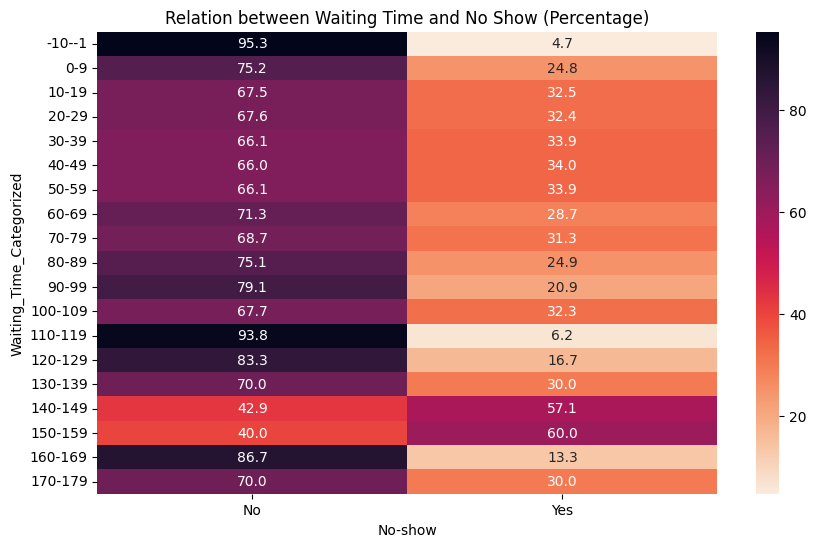

In [42]:
# Convert counts to percentages
wt_hm_percentage = wt_hm_counts.div(wt_hm_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
plt.title('Relation between Waiting Time and No Show (Percentage)')
sns.heatmap(wt_hm_percentage, annot=True, cmap=sns.cm.rocket_r, fmt='.1f')



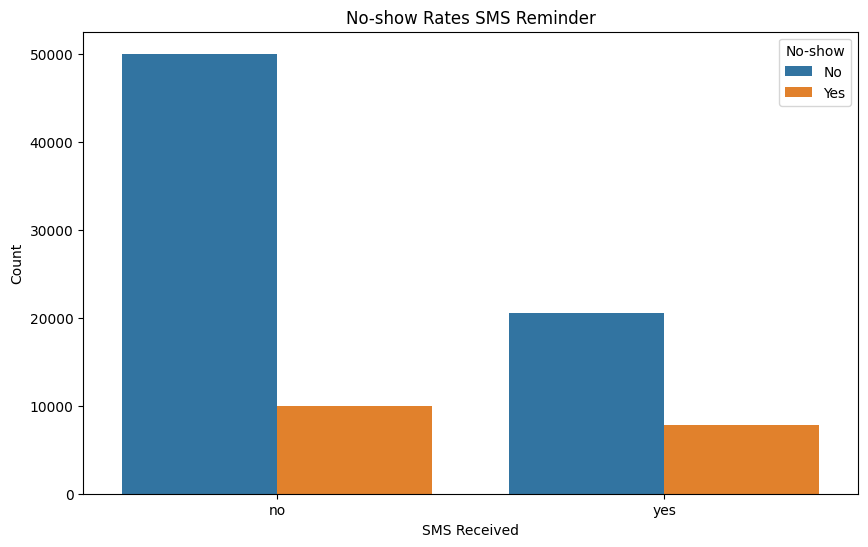

In [43]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SMS_received', hue='No-show')
plt.title('No-show Rates SMS Reminder')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.show()

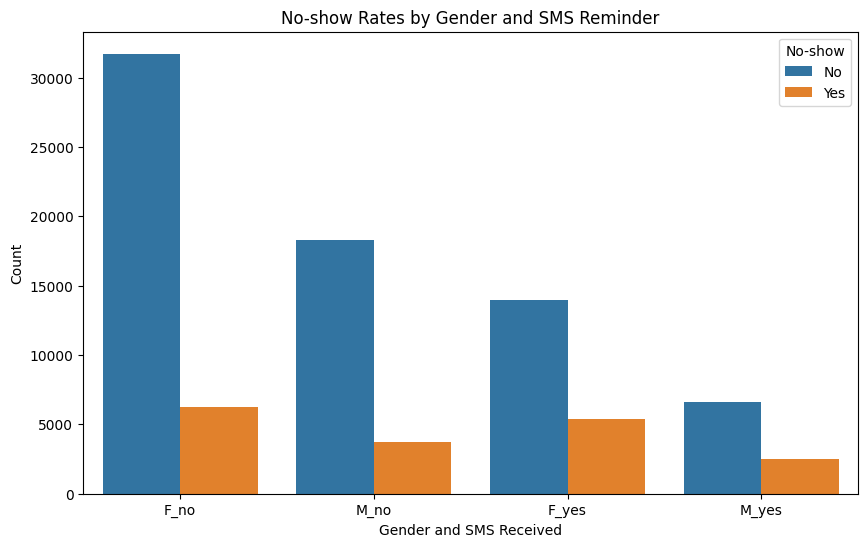

In [44]:
# Create a new column combining Gender and SMS_received
df['Gender_SMS'] = df['Sex'] + "_" + df['SMS_received']

# Countplot with hue for No-show
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender_SMS', hue='No-show')
plt.title('No-show Rates by Gender and SMS Reminder')
plt.xlabel('Gender and SMS Received')
plt.ylabel('Count')
plt.show()

# how to change f_no to f_no_sms_reveibed ...???


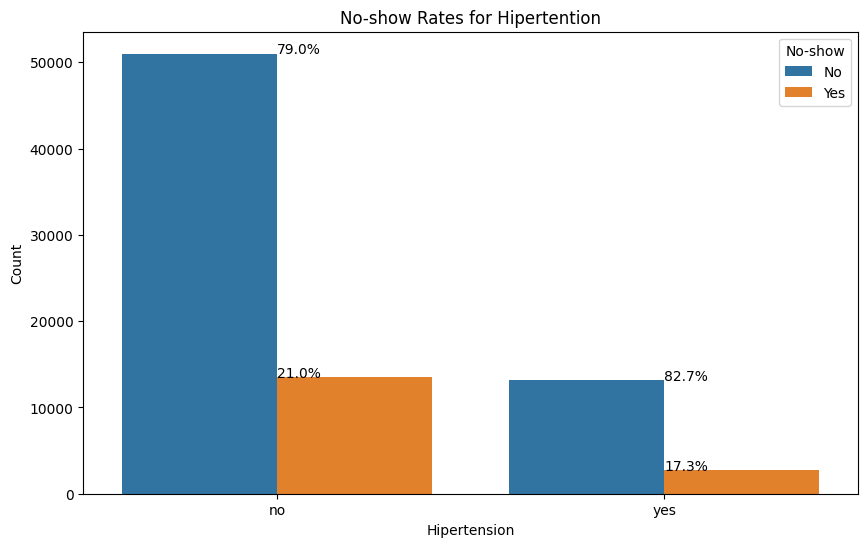

In [45]:
df_condition = df[['No-show','Hipertension','Diabetes','Alcoholism','Handcap']]

plt.figure(figsize=(10, 6))
hipertention_cp= sns.countplot(data=df_condition, x= 'Hipertension', hue='No-show')
plt.title('No-show Rates for Hipertention')
plt.xlabel('Hipertension')
plt.ylabel('Count')


total = len(df_condition)
hipertention_counts = df.groupby(['Hipertension', 'No-show']).size().unstack(fill_value=0)
percentages = hipertention_counts.div(hipertention_counts.sum(axis=1), axis=0) * 100

for i in range(len(hipertention_counts)):
    for j in range(len(hipertention_counts.columns)):
        count = hipertention_counts.iloc[i, j]
        percentage = percentages.iloc[i, j]
        hipertention_cp.text(i, count, f'{percentage:.1f}%')

plt.show()

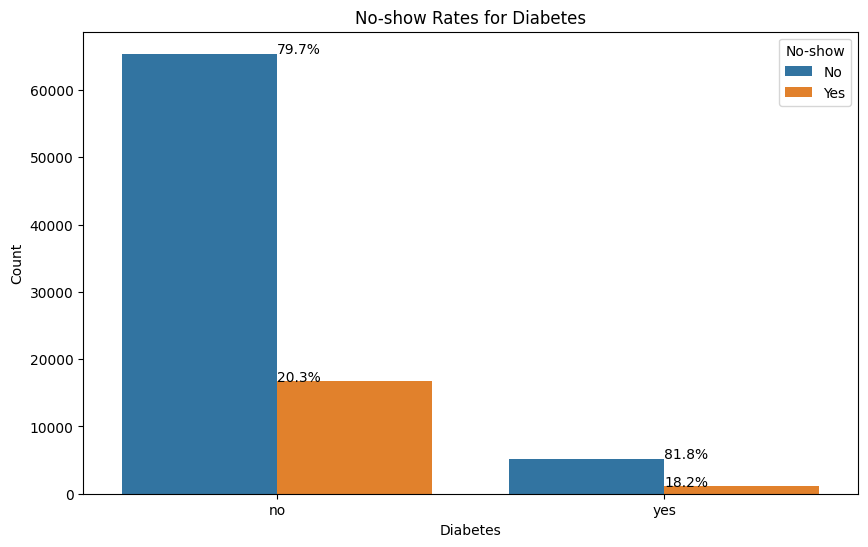

In [46]:
df_condition = df[['No-show','Hipertension','Diabetes','Alcoholism','Handcap']]

plt.figure(figsize=(10, 6))
Diabetes_cp= sns.countplot(data=df_condition, x= 'Diabetes', hue='No-show')
plt.title('No-show Rates for Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')


total = len(df_condition)
Diabetes_counts = df.groupby(['Diabetes', 'No-show']).size().unstack(fill_value=0)
percentages = Diabetes_counts.div(Diabetes_counts.sum(axis=1), axis=0) * 100

for i in range(len(Diabetes_counts)):
    for j in range(len(Diabetes_counts.columns)):
        count = Diabetes_counts.iloc[i, j]
        percentage = percentages.iloc[i, j]
        Diabetes_cp.text(i, count, f'{percentage:.1f}%')

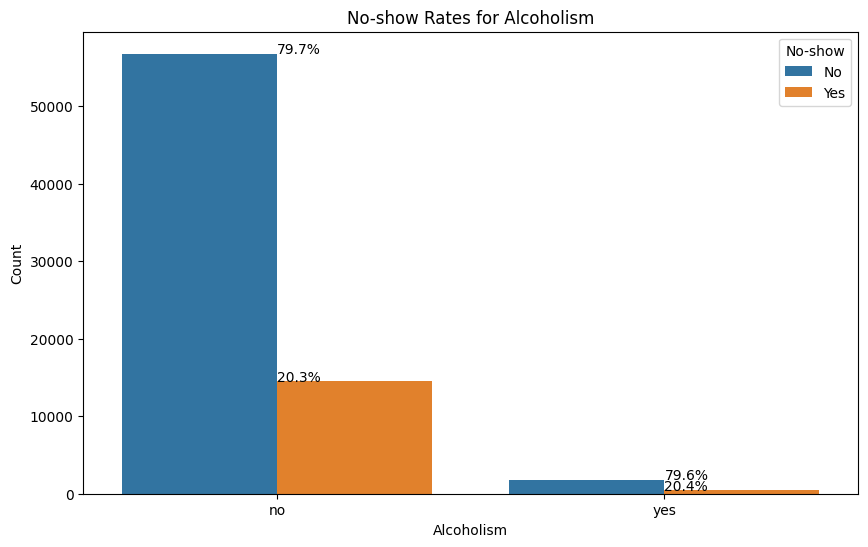

In [47]:
plt.figure(figsize=(10, 6))
Alcoholism_cp= sns.countplot(data=df_condition, x= 'Alcoholism', hue='No-show')
plt.title('No-show Rates for Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Count')


total = len(df_condition)
Alcoholism_counts = df.groupby(['Alcoholism', 'No-show']).size().unstack(fill_value=0)
percentages = Alcoholism_counts.div(Alcoholism_counts.sum(axis=1), axis=0) * 100

for i in range(len(Alcoholism_counts)):
    for j in range(len(Alcoholism_counts.columns)):
        count = Alcoholism_counts.iloc[i, j]
        percentage = percentages.iloc[i, j]
        Alcoholism_cp.text(i, count, f'{percentage:.1f}%')

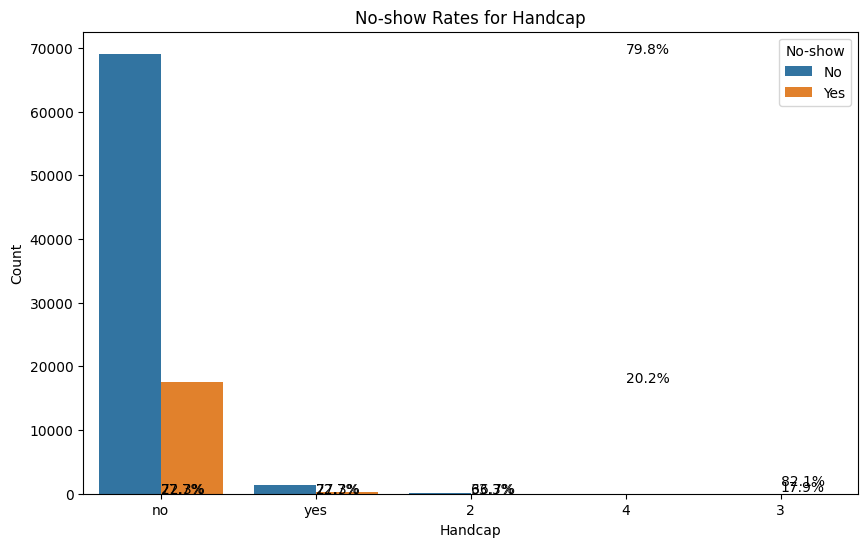

In [48]:
df_condition = df[['No-show','Hipertension','Diabetes','Alcoholism','Handcap']]

plt.figure(figsize=(10, 6))
Handcap_cp= sns.countplot(data=df_condition, x= 'Handcap', hue='No-show')
plt.title('No-show Rates for Handcap')
plt.xlabel('Handcap')
plt.ylabel('Count')


total = len(df_condition)
Handcap_counts = df.groupby(['Handcap', 'No-show']).size().unstack(fill_value=0)
percentages = Handcap_counts.div(Handcap_counts.sum(axis=1), axis=0) * 100

for i in range(len(Handcap_counts)):
    for j in range(len(Handcap_counts.columns)):
        count = Handcap_counts.iloc[i, j]
        percentage = percentages.iloc[i, j]
        Handcap_cp.text(i, count, f'{percentage:.1f}%')

Scatter plot showing relation of waiting time and age

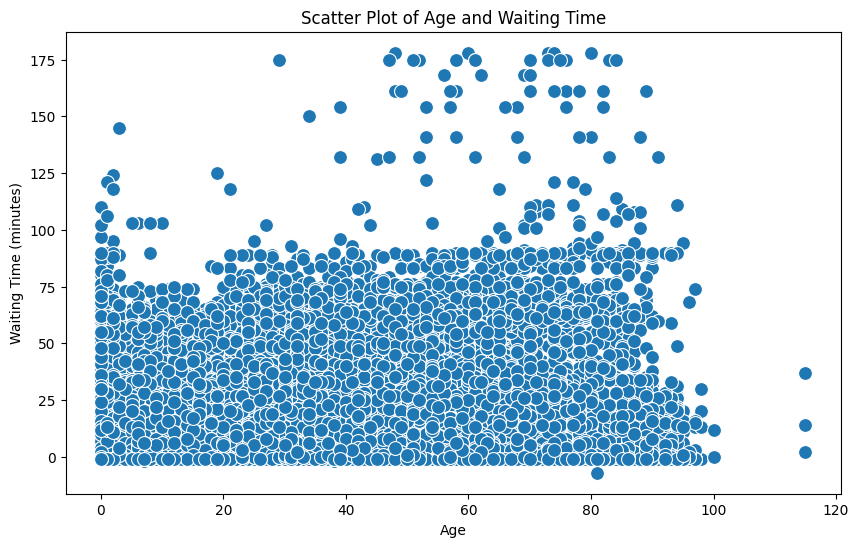

In [49]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='WaitingTime', data=df, s=100)

plt.title('Scatter Plot of Age and Waiting Time')
plt.xlabel('Age')
plt.ylabel('Waiting Time (minutes)')

plt.show()

Pie chart portraying the distribution of female and male patients

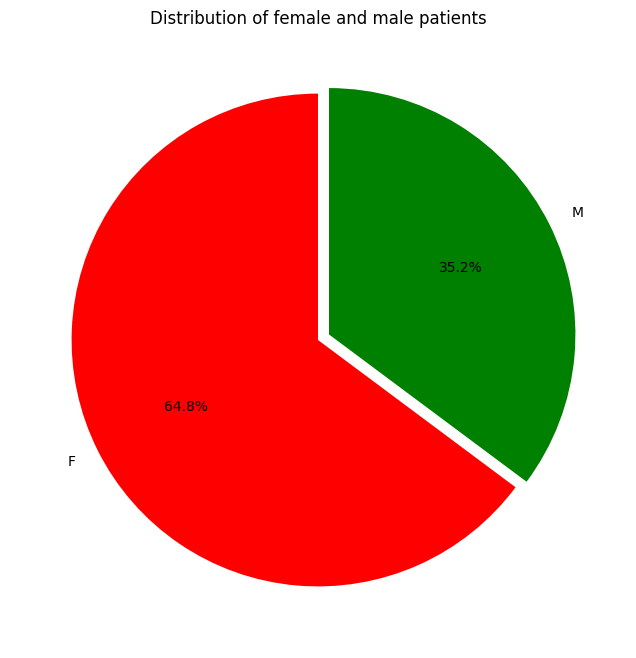

In [63]:
# Counting the occurrences of each sex
sex_counts = df['Sex'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=90, explode=(0, 0.05))
plt.title('Distribution of female and male patients')
plt.show()


Histrogram showing the distribution of the patients age

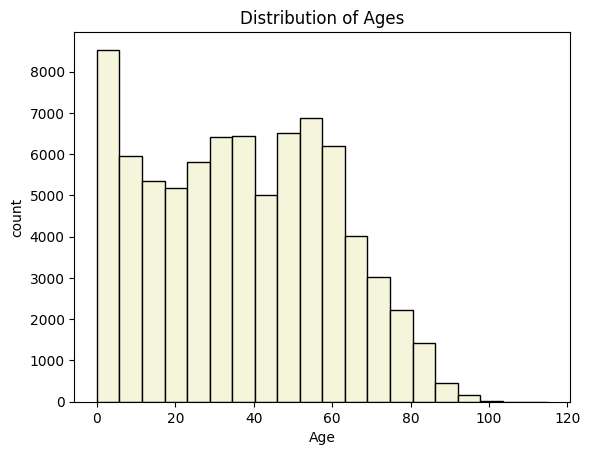

In [51]:
# Histogram for 'Age'
plt.hist(df['Age'], bins=20, edgecolor='black', color= 'beige')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

Violin plot for male and female patients and their age distribution across different ages

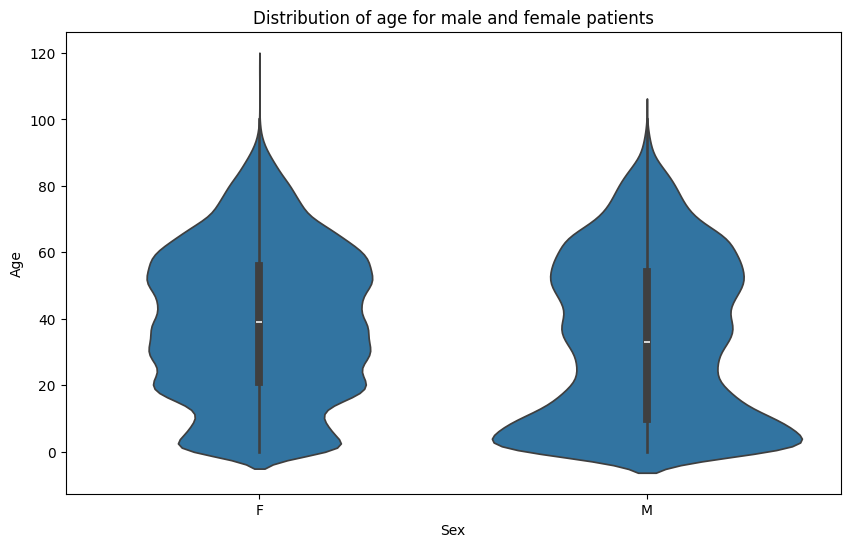

In [61]:
# Violin plot of age by sex
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', data=df)
plt.title('Distribution of age for male and female patients')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


Bar chart to visualize the amount of total patients for each community

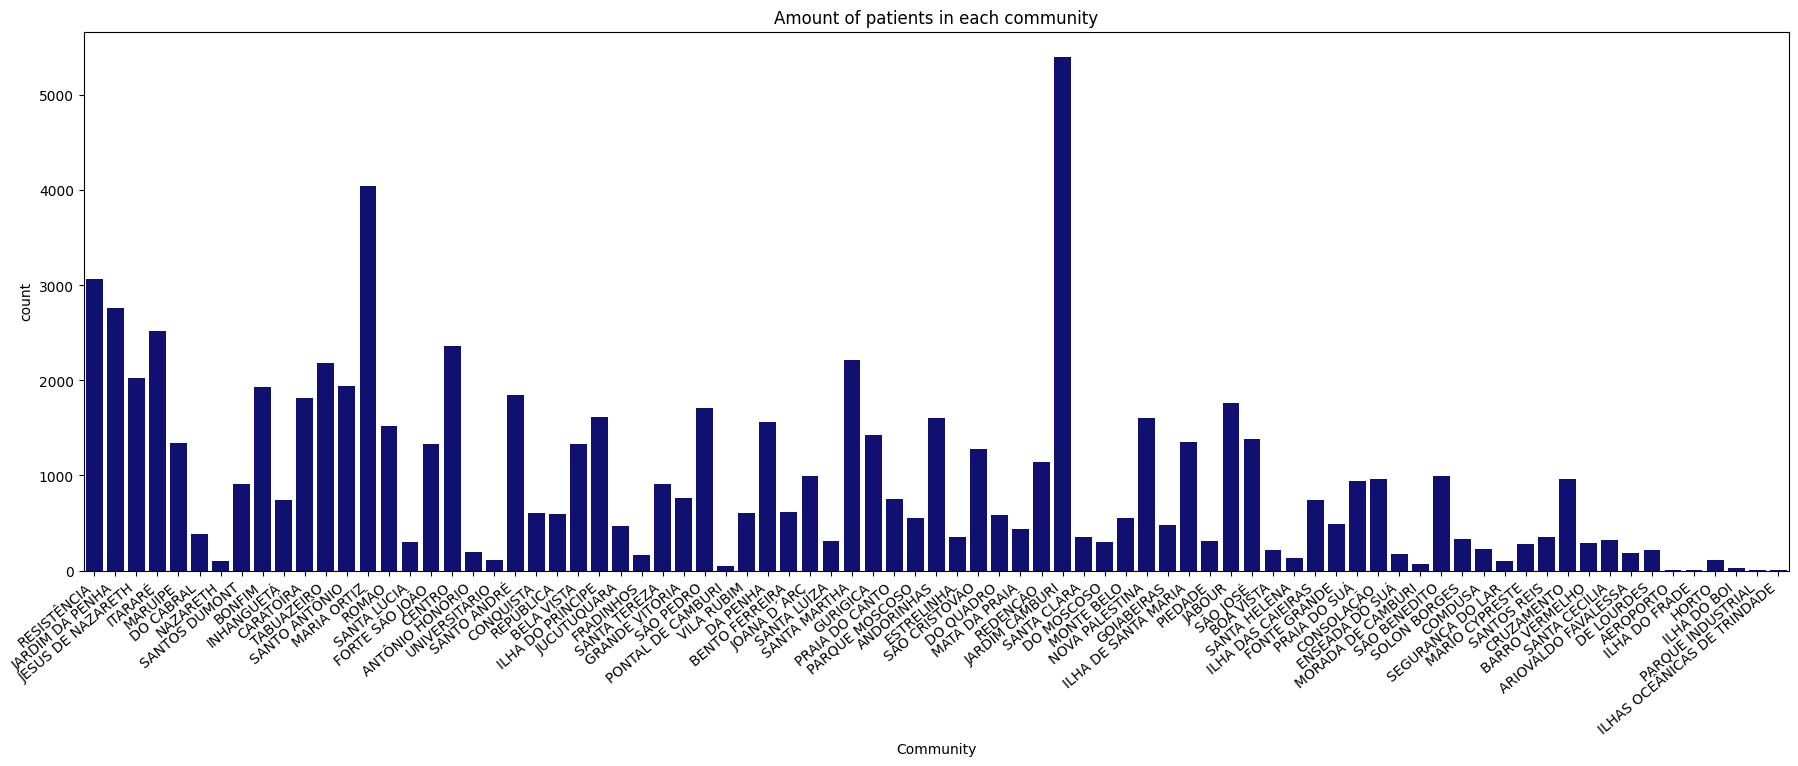

In [52]:
# Count plot for 'Community'
plt.figure(figsize=(22, 7))
sns.countplot(x='Community', data=df, color= 'navy')
plt.title('Amount of patients in each community')
plt.xticks(rotation=40, ha='right')
plt.show()

Bar plot showing the no-show rate in relation to the social-welfare status of the patients

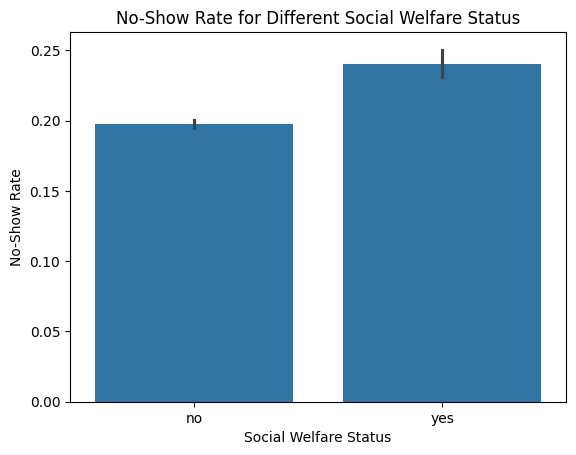

In [56]:
# Bar plot for 'SocialWelfare'
#Creating the barplot

sns.barplot(x='SocialWelfare', y='No-show', data=df)

#Adding labels and litle

plt.title('No-Show Rate for Different Social Welfare Status')
plt.xlabel('Social Welfare Status')
plt.ylabel('No-Show Rate')
plt.show()

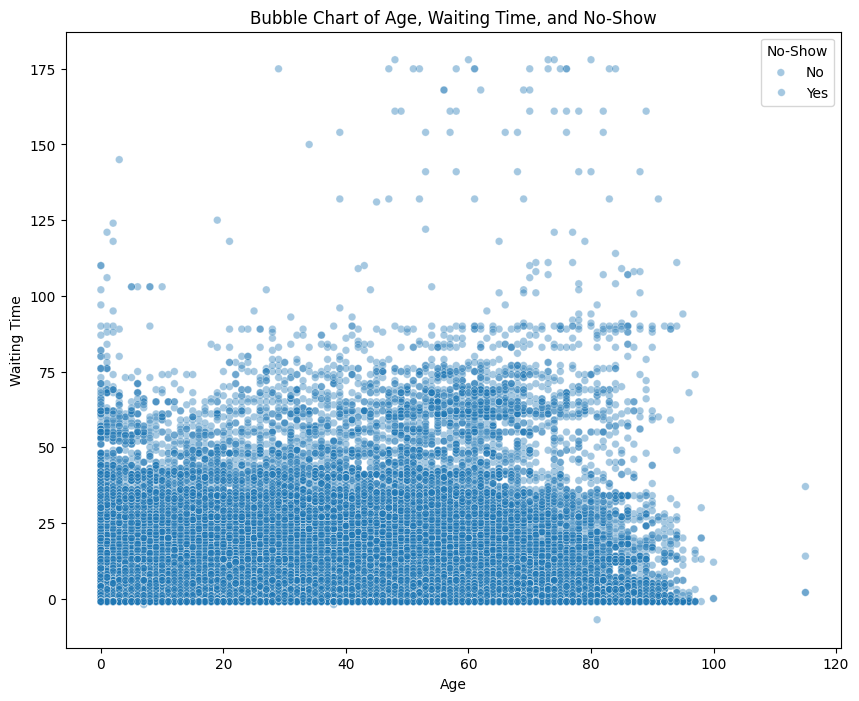

In [57]:

# Convert 'No' to 0 and 'Yes' to 1 for the 'No-show' column
df['No-show'] = (df['No-show'] == 'Yes').astype(int)

# Scatter plot with bubble size based on 'WaitingTime'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='WaitingTime', size='No-show', data=df, sizes=(30, 200), alpha=0.4, hue='No-show')

plt.title('Bubble Chart of Age, Waiting Time, and No-Show')
plt.xlabel('Age')
plt.ylabel('Waiting Time')
plt.legend(title='No-Show', labels=['No', 'Yes'])
plt.show()
